## Welcome
This is just test notebook to try some conecpts

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [118]:
dataset_path = "D:\Jupyter Notebooks\datasets\Football Stadiums.csv"
df = pd.read_csv(dataset_path)
print(df.head())

  Confederation                   Stadium    City  \
0          UEFA       Stadiumi Besëlidhja   Lezhë   
1          UEFA       Stadiumi Flamurtari   Vlorë   
2          UEFA             Stadiumi Laçi    Laçi   
3          UEFA      Stadiumi Niko Dovana  Durrës   
4          UEFA  Stadiumi Selman Stërmasi  Tirana   

                      HomeTeams  Capacity  Country  IOC  Population  
0                    Besëlidhja      7000  Albania  ALB     2876591  
1              Flamurtari Vlorë      8200  Albania  ALB     2876591  
2                       KF Laçi      5000  Albania  ALB     2876591  
3                         Teuta     12040  Albania  ALB     2876591  
4  KF Tirana, Dinamo, Partizani      9500  Albania  ALB     2876591  


In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Confederation  2024 non-null   object
 1   Stadium        2024 non-null   object
 2   City           2024 non-null   object
 3   HomeTeams      2024 non-null   object
 4   Capacity       2024 non-null   int64 
 5   Country        2024 non-null   object
 6   IOC            2024 non-null   object
 7   Population     2024 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 126.6+ KB
None


In [120]:
print(df[['Stadium', 'Capacity', 'Population']])

                       Stadium  Capacity  Population
0          Stadiumi Besëlidhja      7000     2876591
1          Stadiumi Flamurtari      8200     2876591
2                Stadiumi Laçi      5000     2876591
3         Stadiumi Niko Dovana     12040     2876591
4     Stadiumi Selman Stërmasi      9500     2876591
...                        ...       ...         ...
2019           Liberty Stadium     21088     3125000
2020           Parc y Scarlets     14870     3125000
2021               Park Avenue      5000     3125000
2022      Principality Stadium     74500     3125000
2023         Racecourse Ground     15850     3125000

[2024 rows x 3 columns]


In [121]:
print(df.describe())

            Capacity    Population
count    2024.000000  2.024000e+03
mean    22905.075099  9.964931e+07
std     20728.566347  2.326112e+08
min       244.000000  3.219400e+04
25%      7477.750000  1.029103e+07
50%     16408.000000  3.843360e+07
75%     32004.750000  8.081052e+07
max    153000.000000  1.403500e+09


In [122]:
data_refine = df[df['Confederation'] == 'UEFA'][['Capacity', 'Population']]
print(data_refine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1364 entries, 0 to 2023
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Capacity    1364 non-null   int64
 1   Population  1364 non-null   int64
dtypes: int64(2)
memory usage: 32.0 KB
None


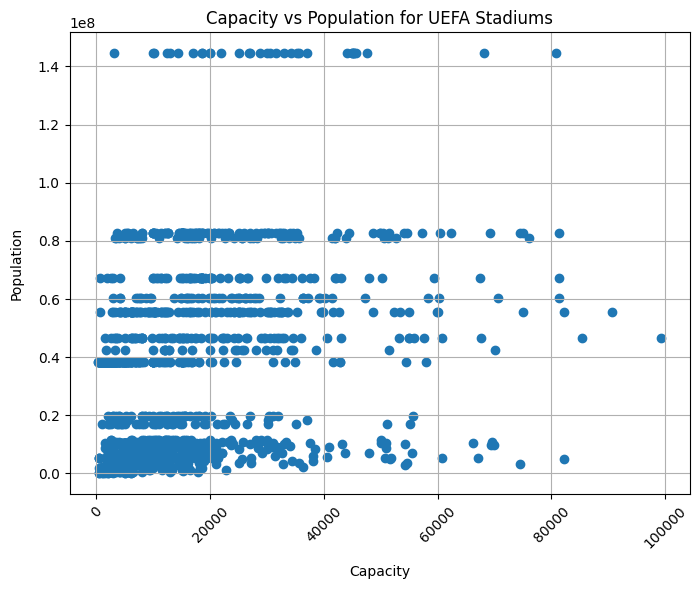

In [123]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(data_refine['Capacity'], data_refine['Population'])
plt.xlabel("Capacity", labelpad=10)
plt.ylabel("Population", labelpad=10)
plt.title("Capacity vs Population for UEFA Stadiums")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [124]:
random_data = data_refine.sample(n=150)
print(random_data)

      Capacity  Population
1843     12680    42418235
1477     12000    19638000
1664     10958    46710000
1287      1500    38433600
1256       927    38433600
...        ...         ...
1066     12470    17100715
1201      2086    38433600
1217      1495    38433600
1645      6563    46710000
624      29000    82800000

[150 rows x 2 columns]


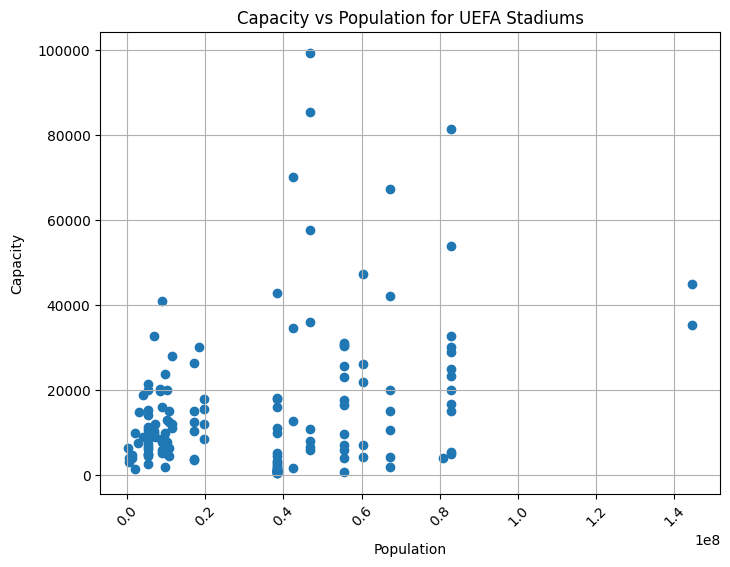

In [125]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(random_data['Population'], random_data['Capacity'])
plt.xlabel("Population", labelpad=10)
plt.ylabel("Capacity", labelpad=10)
plt.title("Capacity vs Population for UEFA Stadiums")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [126]:
population = random_data['Population'].to_numpy()
capacity = random_data['Capacity'].to_numpy()
population = population.reshape((-1, 1))
capacity = capacity.reshape((-1, 1)) 
mean = capacity.mean()
std = capacity.std()
z_scores = (capacity - mean)/std
print(z_scores)

[[-1.54625559e-01]
 [-1.94847345e-01]
 [-2.56481318e-01]
 [-8.15919045e-01]
 [-8.49811815e-01]
 [-5.48680765e-01]
 [-4.07786214e-01]
 [ 4.68382701e-02]
 [-1.53871992e-02]
 [-4.58950692e-01]
 [-1.61368623e-01]
 [-7.86344202e-01]
 [ 7.55274055e-01]
 [ 4.97203977e-01]
 [-4.31446088e-01]
 [-3.35801046e-01]
 [-6.26640051e-01]
 [-8.66551176e-01]
 [ 9.09240687e-01]
 [-3.84126340e-01]
 [ 1.21765543e-02]
 [-5.27564327e-01]
 [-5.97065208e-01]
 [-4.90595774e-01]
 [ 3.23879191e+00]
 [ 1.58644544e+00]
 [-6.90225963e-01]
 [ 2.84205959e-01]
 [-6.08895145e-01]
 [-3.13146717e-01]
 [-8.46854330e-01]
 [ 2.89411131e-01]
 [-7.56769359e-01]
 [-1.94847345e-01]
 [-5.49745459e-01]
 [ 1.60050768e-01]
 [-2.50877477e-02]
 [-6.38469988e-01]
 [ 9.38105733e-01]
 [-3.13146717e-01]
 [-1.73982885e-02]
 [ 6.42120706e-01]
 [ 3.59148610e-01]
 [ 2.82372318e-01]
 [-2.93568171e-01]
 [-4.43276025e-01]
 [ 6.15503348e-01]
 [-8.75068730e-01]
 [-6.04754667e-01]
 [ 1.75709228e+00]
 [ 1.17813516e+00]
 [-7.26603019e-01]
 [ 2.6025033

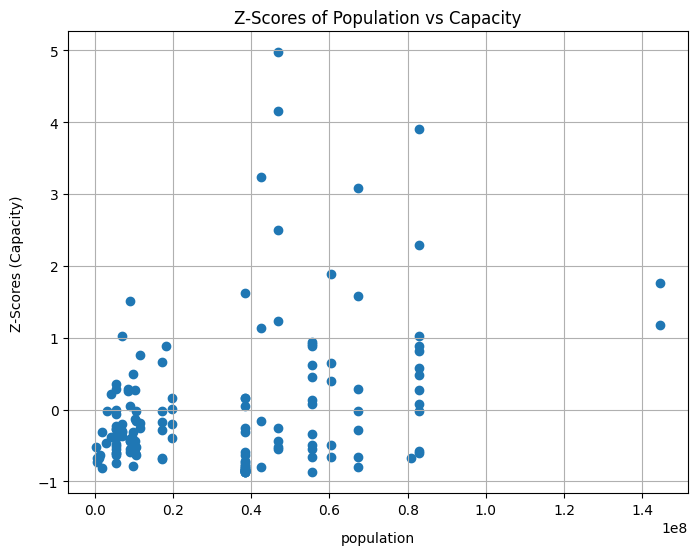

In [127]:

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(population, z_scores)

plt.xlabel("population", labelpad=10)  # Add some padding for readability
plt.ylabel("Z-Scores (Capacity)", labelpad=10)
plt.title("Z-Scores of Population vs Capacity")

plt.grid(True)

plt.show()


Mean Squared Error: 0.8463395365087171


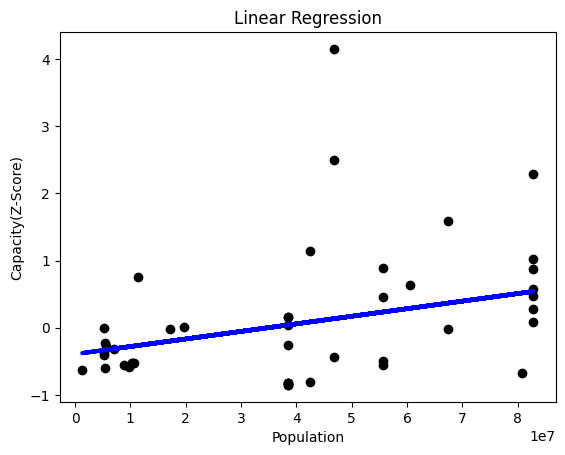

In [128]:

X_train, X_test, y_train, y_test = train_test_split(population, z_scores, test_size=0.3, random_state=50)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Visualize the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Population')
plt.ylabel('Capacity(Z-Score)')
plt.title('Linear Regression')
plt.show()

In [129]:
capacity_pred = y_pred * std + mean